In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (PolynomialFeatures, StandardScaler)
from sklearn.model_selection import train_test_split, KFold,cross_val_predict,GridSearchCV
from sklearn.metrics import r2_score
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline

In [113]:
data = pd.read_csv('car details v3.csv')

In [114]:
#7907 entries have no null values from 8128
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [115]:
#drop nan values
data_d= data.dropna()

In [116]:
data_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 864.7+ KB


In [117]:
data_d.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [118]:
#replace string values with whitespace in order to make thes specific columns numeric 
data_d.engine = data_d.engine.str.replace('[CC]','')
data_d.mileage = data_d.mileage.str.replace('[kmpl]','')
data_d.max_power = data_d.max_power.str.replace('[bhp]','')

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [119]:
data_d.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [120]:
#drop the column name which has unique name and it will ruin my initial model
drop_data = data_d.drop(['name'], axis=1)

In [121]:
drop_data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [122]:
drop_data['owner'].value_counts()

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

In [123]:
#except of first and second owner, has small amout entries
#i am adding the rest in one category 
drop_data['owner']= np.where((drop_data.owner == 'Third Owner'), 'Other Owner', drop_data.owner)

In [124]:
drop_data['owner'].value_counts()

First Owner             5215
Second Owner            2016
Other Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

In [125]:
drop_data['owner']= np.where((drop_data.owner == 'Test Drive Car'), 'Other Owner', drop_data.owner)

In [126]:
drop_data['owner']= np.where((drop_data.owner == 'Fourth & Above Owner'), 'Other Owner', drop_data.owner)

In [127]:
drop_data['owner'].value_counts()

First Owner     5215
Second Owner    2016
Other Owner      675
Name: owner, dtype: int64

In [128]:
drop_data['seller_type'].value_counts()

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [129]:
#trustmark dealer has very small amount of entries
#i will add the to the dealers 
drop_data['seller_type']= np.where((drop_data.seller_type == 'Trustmark Dealer'), 'Dealer', drop_data.seller_type)

In [130]:
drop_data['seller_type'].value_counts()

Individual    6563
Dealer        1343
Name: seller_type, dtype: int64

In [131]:
drop_data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Other Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [132]:
drop_data1 =drop_data.drop(['torque'], axis=1)

In [133]:
drop_data1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Other Owner,17.7,1497,78,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0


In [134]:
drop_data1['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

In [135]:
drop_data1['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [136]:
#dropping the CNG and LPG entries because i want to deal only with diesel and petrol 
#and because in this dataset they have insaficient number of entries
drop_data1 = drop_data1.loc[drop_data1['fuel'] != 'CNG']

In [137]:
drop_data1 = drop_data1[drop_data.fuel != 'LPG']

<ipython-input-137-e396d3940e32>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  drop_data1 = drop_data1[drop_data.fuel != 'LPG']


In [138]:
drop_data1['fuel'].value_counts()

Diesel    4299
Petrol    3520
Name: fuel, dtype: int64

<AxesSubplot:>

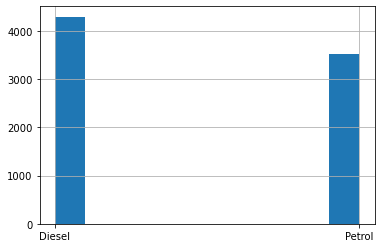

In [139]:
drop_data1['fuel'].hist()

In [140]:
drop_data['seats'].value_counts()

5.0     6254
7.0     1120
8.0      235
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

In [141]:
#only cars with 5 or 7 seats have enought entries
#i am putting the rest in a category 1(seats:8,4,9,6,10,2,14)
boolean_condition = (drop_data1.seats != 5) & (drop_data1.seats != 7)
column_name = "seats"
new_value = 1
drop_data1.loc[boolean_condition, column_name] = new_value

In [142]:
drop_data1['seats'].value_counts()

5.0    6172
7.0    1119
1.0     528
Name: seats, dtype: int64

<AxesSubplot:>

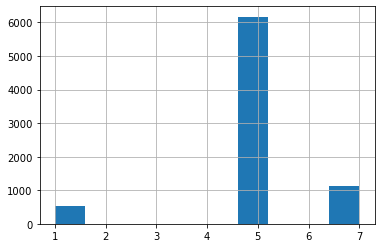

In [143]:
drop_data1['seats'].hist()

In [144]:
drop_data1['max_power'] = drop_data1.max_power.astype(float)

In [145]:
drop_data1['max_power'].sort_values(ascending=False)

170     400.0
148     282.0
134     280.0
7703    280.0
5248    280.0
        ...  
616      34.2
814      34.2
29       34.2
3258     34.2
1236     34.2
Name: max_power, Length: 7819, dtype: float64

<AxesSubplot:>

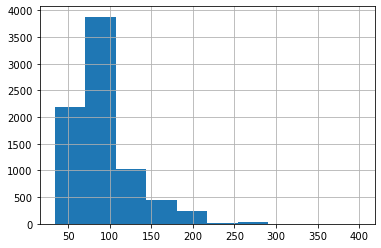

In [146]:
drop_data1['max_power'].hist()

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

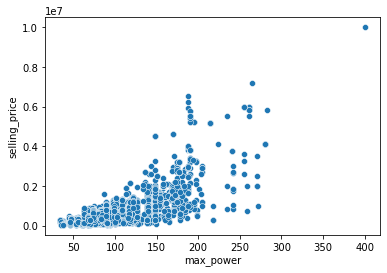

In [147]:
sns.scatterplot(data=drop_data1, x='max_power', y='selling_price')

In [148]:
#from the scatter plot i can see that the car with max power 400 is an outlier
#so i am deleting it
drop_data1 = drop_data1.loc[drop_data1['max_power'] < 400]

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

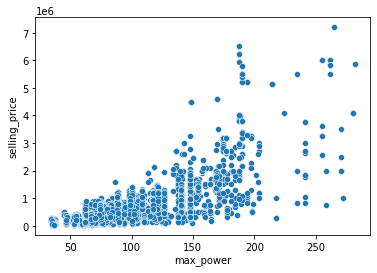

In [149]:
sns.scatterplot(data=drop_data1, x='max_power', y='selling_price')

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

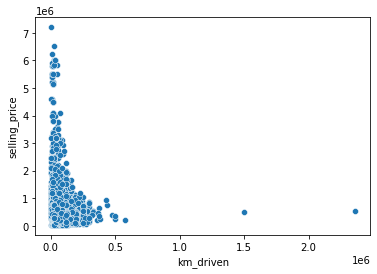

In [150]:
sns.scatterplot(data=drop_data1, x='km_driven', y='selling_price')

In [151]:
#from the scatter plot i can see that cars driven more than 60000km are outliers 
#have only 2 entries
#so deleting them
drop_data1['km_driven'].sort_values(ascending=False)

3486    2360457
1810    1500000
3508     577414
6673     500000
3641     500000
         ...   
7429       1000
2963       1000
399        1000
7492       1000
6638       1000
Name: km_driven, Length: 7818, dtype: int64

In [152]:
drop_data1 = drop_data1.loc[drop_data1['km_driven'] < 1500000]

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

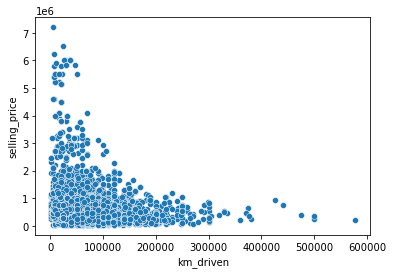

In [153]:
sns.scatterplot(data=drop_data1, x='km_driven', y='selling_price')

<AxesSubplot:xlabel='selling_price', ylabel='engine'>

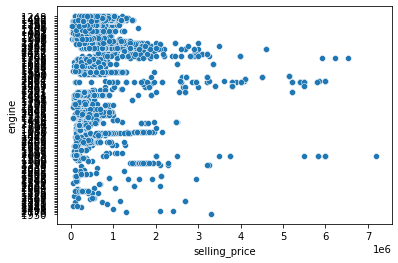

In [154]:
sns.scatterplot(data=drop_data1, x='selling_price', y='engine')

In [155]:
drop_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7816 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7816 non-null   int64  
 1   selling_price  7816 non-null   int64  
 2   km_driven      7816 non-null   int64  
 3   fuel           7816 non-null   object 
 4   seller_type    7816 non-null   object 
 5   transmission   7816 non-null   object 
 6   owner          7816 non-null   object 
 7   mileage        7816 non-null   object 
 8   engine         7816 non-null   object 
 9   max_power      7816 non-null   float64
 10  seats          7816 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 732.8+ KB


In [156]:
#the column mileage in one entry have special charcters
#and replacing the with whitespace 
#in order to convert it to numeric from object
drop_data1.mileage = drop_data1.mileage.str.replace('[/]','')
drop_data1.mileage = drop_data1.mileage.str.replace('[g]','')

In [157]:
#convert mileage from object to float 
drop_data1['mileage'] = drop_data1.mileage.astype(float)
drop_data1['engine'] = drop_data1.engine.astype(float)

In [158]:
#add new column with binary values of 1 and 0 
#from fuel, seller type and transmission
drop_data1["OHC_fuel"] = np.where(drop_data1["fuel"].str.contains("Diesel"), 1, 0)
drop_data1["OHC_seller"] = np.where(drop_data1["seller_type"].str.contains("Individual"), 1, 0)
drop_data1["OHC_transmission"] = np.where(drop_data1["transmission"].str.contains("Manual"), 1, 0)

In [159]:
#add new column with  values of 0,1,2 
#from owner
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
drop_data1["OHC_owner"] = ord_enc.fit_transform(drop_data1[["owner"]])
drop_data1[["owner", "OHC_owner"]].head(10)

,owner,OHC_owner
0,First Owner,0.0
1,Second Owner,2.0
2,Other Owner,1.0
3,First Owner,0.0
4,First Owner,0.0
5,First Owner,0.0
7,Second Owner,2.0
8,First Owner,0.0
9,First Owner,0.0
10,Second Owner,2.0


<AxesSubplot:xlabel='OHC_owner', ylabel='selling_price'>

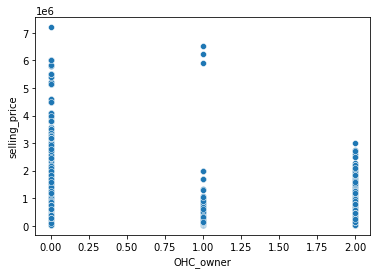

In [160]:
sns.scatterplot(data=drop_data1, x='OHC_owner', y='selling_price')

In [161]:
drop_data1

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,OHC_fuel,OHC_seller,OHC_transmission,OHC_owner
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,1,1,1,0.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,1,1,1,2.0
2,2006,158000,140000,Petrol,Individual,Manual,Other Owner,17.70,1497.0,78.00,5.0,0,1,1,1.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,1,1,1,0.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,0,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,0,1,1,0.0
8124,2007,135000,119000,Diesel,Individual,Manual,Other Owner,16.80,1493.0,110.00,5.0,1,1,1,1.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,1,1,1,0.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,1,1,1,0.0


In [162]:
drop_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7816 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              7816 non-null   int64  
 1   selling_price     7816 non-null   int64  
 2   km_driven         7816 non-null   int64  
 3   fuel              7816 non-null   object 
 4   seller_type       7816 non-null   object 
 5   transmission      7816 non-null   object 
 6   owner             7816 non-null   object 
 7   mileage           7816 non-null   float64
 8   engine            7816 non-null   float64
 9   max_power         7816 non-null   float64
 10  seats             7816 non-null   float64
 11  OHC_fuel          7816 non-null   int32  
 12  OHC_seller        7816 non-null   int32  
 13  OHC_transmission  7816 non-null   int32  
 14  OHC_owner         7816 non-null   float64
dtypes: float64(5), int32(3), int64(3), object(4)
memory usage: 885.4+ KB


In [163]:
# Add Range and median in the stats
stats_df = drop_data1.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,year,selling_price,km_driven,mileage,engine,max_power,seats,OHC_fuel,OHC_seller,OHC_transmission,OHC_owner
mean,2013.991044,6.528231e+05,68654.610031,19.388132,1462.968398,91.890955,5.016377,0.549898,0.828301,0.86694,0.593654
25%,2012.000000,2.700000e+05,34000.000000,16.780000,1197.000000,69.000000,5.000000,0.000000,1.000000,1.00000,0.000000
median,2015.000000,4.550000e+05,60000.000000,19.300000,1248.000000,82.400000,5.000000,1.000000,1.000000,1.00000,0.000000
75%,2017.000000,6.950000e+05,96000.000000,22.320000,1582.000000,102.000000,5.000000,1.000000,1.000000,1.00000,2.000000
range,26.000000,7.170001e+06,576414.000000,28.400000,2980.000000,247.800000,6.000000,1.000000,1.000000,1.00000,2.000000


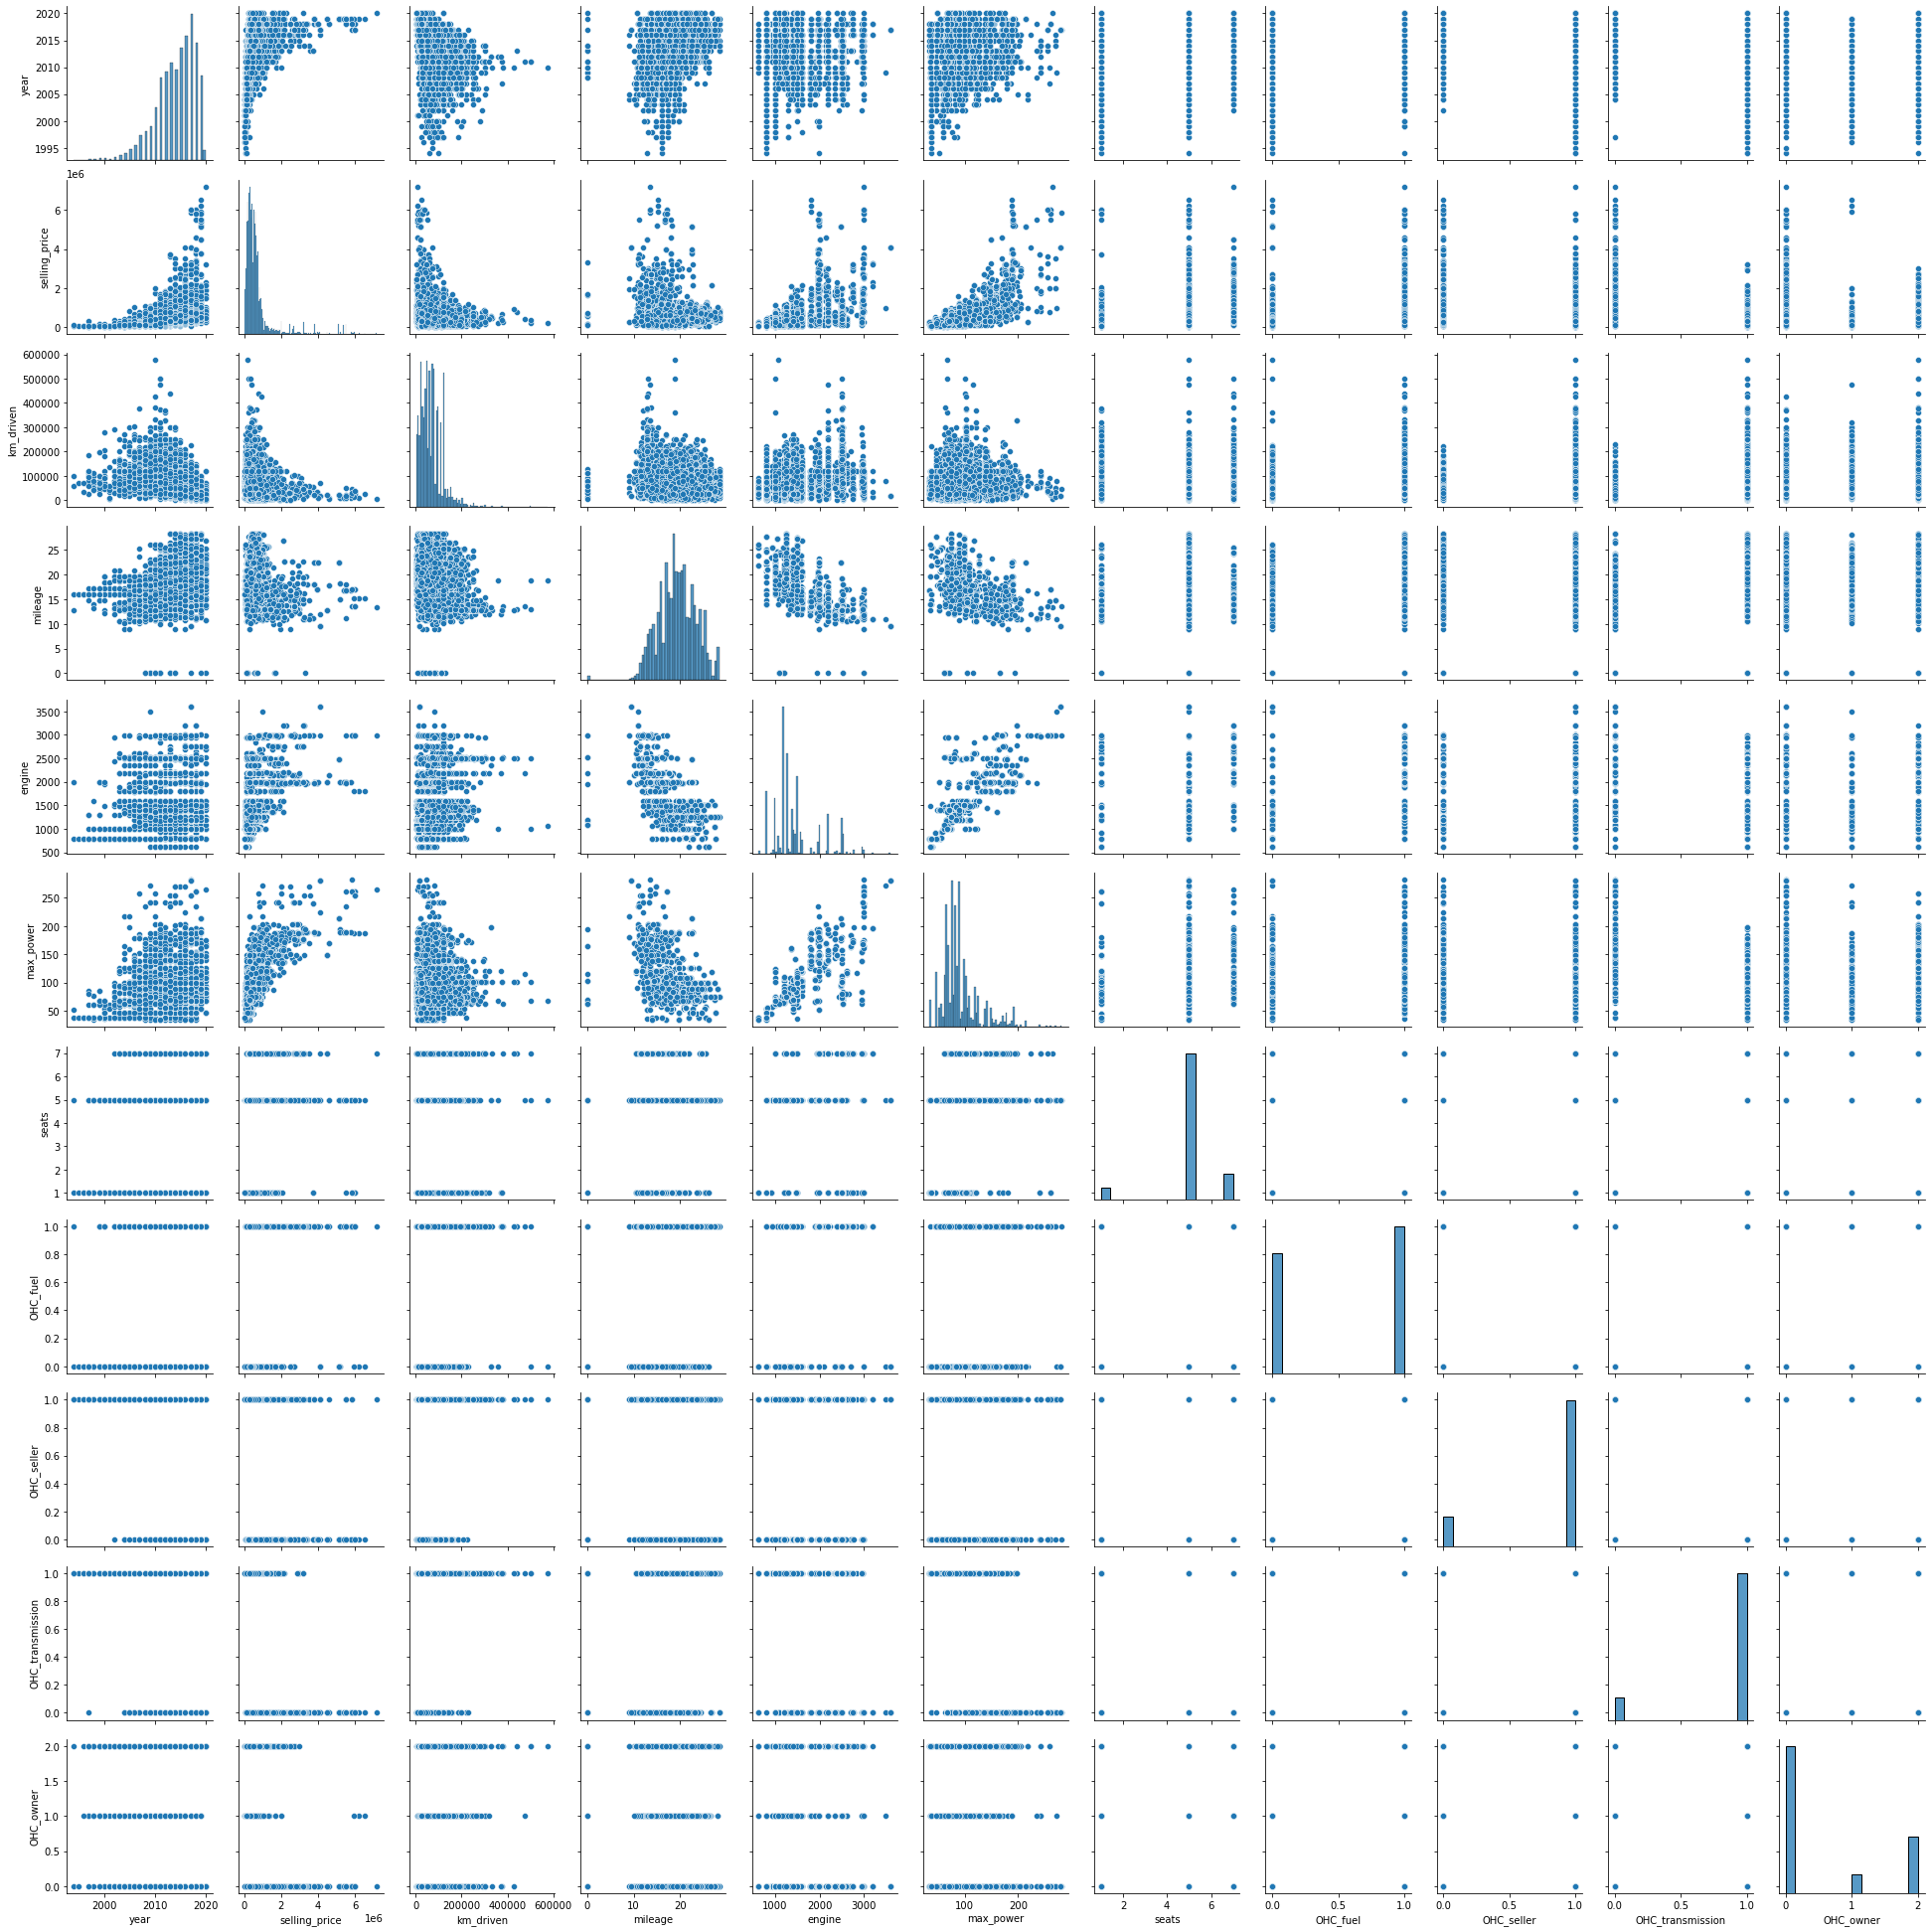

In [164]:
plot = sns.pairplot(drop_data1)

In [165]:
plot.savefig('snspairplotCars.png')

In [166]:
data = drop_data1.copy()

In [167]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,OHC_fuel,OHC_seller,OHC_transmission,OHC_owner
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,1,1,1,0.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,1,1,1,2.0
2,2006,158000,140000,Petrol,Individual,Manual,Other Owner,17.70,1497.0,78.00,5.0,0,1,1,1.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,1,1,1,0.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,0,1,1,0.0


In [168]:
data.to_csv(r'cardata.csv',index=False)

In [169]:
df_small = drop_data1.loc[:,['km_driven','mileage','engine',
                             'max_power','seats','OHC_fuel',
                             'OHC_seller','OHC_transmission',
                             'OHC_owner','selling_price']]


In [170]:
data = df_small.copy()

In [171]:
data.head()

,km_driven,mileage,engine,max_power,seats,OHC_fuel,OHC_seller,OHC_transmission,OHC_owner,selling_price
0,145500,23.40,1248.0,74.00,5.0,1,1,1,0.0,450000
1,120000,21.14,1498.0,103.52,5.0,1,1,1,2.0,370000
2,140000,17.70,1497.0,78.00,5.0,0,1,1,1.0,158000
3,127000,23.00,1396.0,90.00,5.0,1,1,1,0.0,225000
4,120000,16.10,1298.0,88.20,5.0,0,1,1,0.0,130000


In [172]:
df_small.head()

,km_driven,mileage,engine,max_power,seats,OHC_fuel,OHC_seller,OHC_transmission,OHC_owner,selling_price
0,145500,23.40,1248.0,74.00,5.0,1,1,1,0.0,450000
1,120000,21.14,1498.0,103.52,5.0,1,1,1,2.0,370000
2,140000,17.70,1497.0,78.00,5.0,0,1,1,1.0,158000
3,127000,23.00,1396.0,90.00,5.0,1,1,1,0.0,225000
4,120000,16.10,1298.0,88.20,5.0,0,1,1,0.0,130000


In [173]:
from scipy.stats.mstats import normaltest

In [174]:
normaltest(df_small.selling_price.values)

NormaltestResult(statistic=6498.611556870077, pvalue=0.0)

<AxesSubplot:>

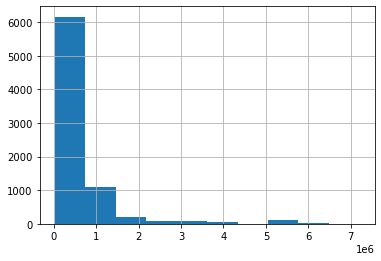

In [175]:
df_small.selling_price.hist()

In [176]:
from scipy.stats import boxcox

In [177]:
bc_result = boxcox(df_small.selling_price)
boxcox_sp = bc_result[0]
lam = bc_result[1]

In [178]:
lam

-0.06971836817030176

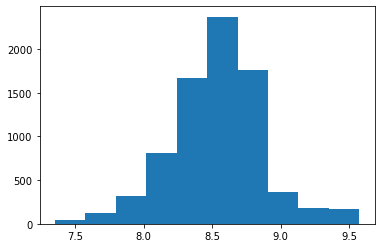

In [179]:
plt.hist(boxcox_sp);

In [180]:
normaltest(boxcox_sp)

NormaltestResult(statistic=136.4908378856406, pvalue=2.2982175563838492e-30)

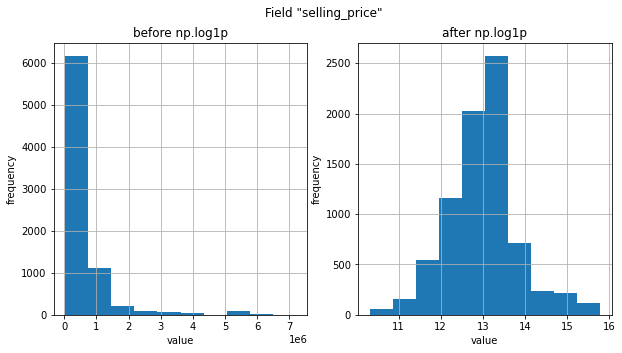

In [181]:
#  apply np.log1p and visualize.

# Choose a field
field = "selling_price"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df_small[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df_small[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

<AxesSubplot:>

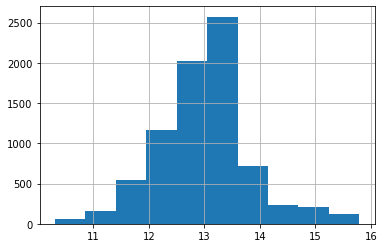

In [182]:
col = "selling_price"
df_small[col] = df_small[col].apply(np.log1p)
df_small[col].hist()

In [183]:
normaltest(df_small['selling_price'].values)

NormaltestResult(statistic=232.49104900261273, pvalue=3.2749913943028243e-51)

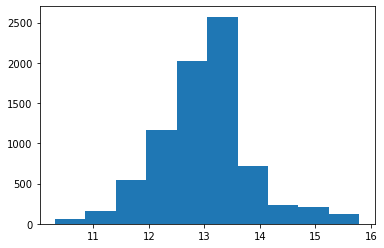

In [184]:
plt.hist(df_small['selling_price']);

In [185]:
log = np.log(df_small.selling_price)

<AxesSubplot:>

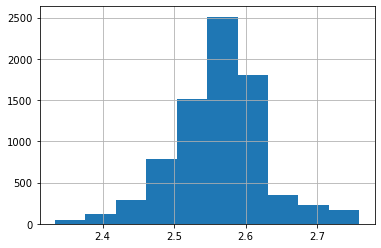

In [186]:
log.hist()

In [187]:
normaltest(log)

NormaltestResult(statistic=142.9379456568687, pvalue=9.149965853066058e-32)

(array([  46.,  152.,  366.,  989., 1862., 2452., 1307.,  301.,  204.,
         137.]),
 array([3.21075578, 3.28704139, 3.36332701, 3.43961262, 3.51589824,
        3.59218385, 3.66846947, 3.74475508, 3.82104069, 3.89732631,
        3.97361192]),
 <BarContainer object of 10 artists>)

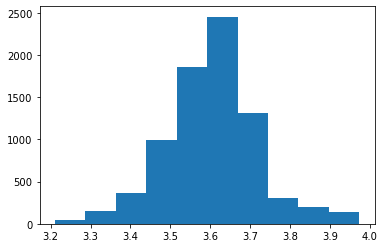

In [188]:
plt.hist(np.sqrt(df_small['selling_price']))

Create X and y

In [189]:
y_col = 'selling_price'

X = data.drop(y_col,axis=1)
y = data[y_col]

In [190]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7816, dtype: int64

Linear Regression and 
Polynomial features

In [191]:
lr = LinearRegression()
pf = PolynomialFeatures(degree=3, include_bias=False)
X_pf = pf.fit_transform(X)

In [192]:
print('X shape',X.shape)
print('X with poly features shape', X_pf.shape)

X shape (7816, 9)
X with poly features shape (7816, 219)


train_test_split

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, random_state=72018)

Standard scaler

In [194]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

Transformation:boxcox

In [195]:
bc_result = boxcox(y_train)
y_train_bc = bc_result[0]
lam = bc_result[1]
lam

-0.07865821095957382

In [196]:
y_train_bc.shape

(5471,)

Fit and transform with Linear regression

In [197]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

In [198]:
y_test

3053     650000
7428     780000
4424     650000
2712     325000
1873     779000
         ...   
760       67500
834      615000
3884     190000
5822    1150000
6485     270000
Name: selling_price, Length: 2345, dtype: int64

In [199]:
y_pred_bc

array([8.21433574, 8.05540048, 8.32878369, ..., 7.81179872, 8.37067304,
       7.92154848])

In [200]:
#invert from boxcox transformation in order to be in the same scale
from scipy.special import inv_boxcox
#R2 score with boxcox
y_pred_tran_l = inv_boxcox(y_pred_bc,lam)
r2_Li = r2_score(y_pred_tran_l, y_test)
r2_Li

0.8455083009369075

[Text(0.5, 0, 'Actual price'),
 Text(0, 0.5, 'predicted price'),
 (0.0, 6523000.0),
 (0.0, 6523000.0),
 Text(0.5, 1.0, 'linear Regression')]

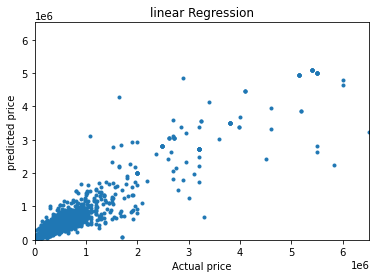

In [219]:
f = plt.Figure(figsize=(6,6))
ax=plt.axes()

ax.plot(y_test, y_pred_tran_l, marker="o", ls="",ms=3.0)

lim=(0,y_test.max())

ax.set(xlabel="Actual price",
      ylabel="predicted price",
      xlim=lim,
      ylim=lim,
      title = "linear Regression")

In [202]:
#linear regression coeficients
print(lr.coef_)

[-1.65235286e-01 -1.49039260e+00  2.09469998e-01 -1.58452410e+00
  1.26339677e+00  6.06479201e-01  1.10003951e-01 -2.43113595e-01
  2.13589780e-01  2.56779549e-01 -1.86276154e-01 -1.56720356e-01
  1.07364173e-02 -2.96199655e-01  1.19423804e-01  1.98491433e-02
  1.00321548e-01  1.90602214e-01  2.53749396e+00  1.13439927e+00
  2.05291269e+00 -1.58930212e+00 -1.22606232e+00  4.02087133e-02
  7.23069724e-01 -3.83136510e-01  3.35589911e+00 -2.77110985e+00
 -2.69930976e+00 -2.40256131e+00 -1.10732271e-01  5.35594383e-01
 -7.08341531e-01  1.87367795e+00  1.13124193e-01  1.25675684e+00
  1.08154477e-01  1.66634354e-01  3.46513193e-01  5.49006254e-01
  3.97820508e-01 -3.46815362e-01 -3.06478141e-01 -7.22846173e-03
  6.06479201e-01 -1.04344457e-02 -3.50956396e-01  1.10945686e-01
  1.10003951e-01 -9.17053429e-02 -1.32666559e-01 -2.43113595e-01
  1.50455170e-02 -8.78937876e-03 -6.94498038e-02 -8.96639942e-04
  2.67010051e-02  6.21052962e-02  5.56044349e-03 -6.20189208e-02
 -8.54703038e-02 -3.67067

In [203]:
pd.DataFrame(zip(X.columns,lr.coef_)).sort_values(by=1)

,0,1
3,max_power,-1.584524
1,mileage,-1.490393
7,OHC_transmission,-0.243114
0,km_driven,-0.165235
6,OHC_seller,0.110004
2,engine,0.209470
8,OHC_owner,0.213590
5,OHC_fuel,0.606479
4,seats,1.263397


In [204]:
#initilazing kfolds with 5 splits and shuffle
kf = KFold(shuffle=True, random_state=72018, n_splits=5)

# Ridge regression with GridSearch CV to find the best tuning parameters for ridge regression and Apply them to the algorithm

In [205]:
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(1e-7, 1e-00, 10)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [206]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([1.00000000e-07, 5.99484250e-07, 3.59381366e-06, 2.15443469e-05,
       1.29154967e-04, 7.74263683e-04, 4.64158883e-03, 2.78255940e-02,
       1.66810054e-01, 1.00000000e+00])})

In [207]:
grid.best_score_, grid.best_params_

(0.8816849240682858,
 {'polynomial_features__degree': 3, 'ridge_regression__alpha': 1.0})

In [208]:
y_predict_R = grid.predict(X)

In [209]:
r2_R = r2_score(y, y_predict_R)
r2_R

0.9078627327434854

In [210]:
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.00000000e+00, -4.05176524e+04,  3.19638028e+04, -9.12116036e+04,
        1.70643831e+05,  1.94013711e+04,  2.19210158e+04, -1.36787403e+04,
       -2.21659335e+03, -3.59216962e+04,  6.38100491e+04, -2.29231834e+04,
        6.82525306e+04, -1.86054206e+05, -6.88059748e+03, -2.54973066e+04,
       -2.00618544e+04, -1.91714270e+04,  2.24433107e+04, -4.70979975e+04,
       -1.17402324e+05,  8.13516922e+04,  2.34104293e+04,  1.02367926e+05,
        7.30944680e+03,  1.06604146e+04, -9.46262316e+03, -4.82255325e+04,
       -7.15350034e+04,  9.75403632e+04,  1.29316727e+05, -7.10011417e+04,
       -6.96687408e+04, -3.49240005e+04,  1.22468359e+05, -2.84389892e+04,
        3.59095697e+03,  9.53306839e+04,  8.39802234e+04, -2.74011142e+04,
        4.87390655e+04, -3.37043124e+04,  6.71130020e+03,  1.52689659e+04,
        1.04127808e+04, -4.39717910e+03,  2.06699635e+04,  1.45725192e+04,
       -4.75362182e+03,  2.38160726e+04, -3.45272826e+03, -7.61538759e+04,
        4.78951790e+03, -

In [211]:
pd.DataFrame(zip(X.columns, grid.best_estimator_.named_steps['ridge_regression'].coef_)).sort_values(by=1)

,0,1
3,max_power,-91211.603586
1,mileage,-40517.652396
7,OHC_transmission,-13678.740284
8,OHC_owner,-2216.593348
0,km_driven,0.000000
5,OHC_fuel,19401.371070
6,OHC_seller,21921.015804
2,engine,31963.802801
4,seats,170643.831075


# Lasso regression with alpha of 0.70  and Apply them to the algorithm with cross_val predict

In [212]:
estimator_las = Pipeline([("scaler", StandardScaler()),
                          ("polynomial_features", pf),
                          ("lasso_regression", Lasso(alpha=0.70, max_iter=10000))])

predictions_las = cross_val_predict(estimator_las, X, y, cv=kf)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167068124140676.38, tolerance: 411866910448.01843
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173298728231434.28, tolerance: 421995071447.3336
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168226321621706.3, tolerance: 406486618132.74774
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to

In [213]:
len(predictions_las)

7816

In [214]:
estimator_las.fit(X,y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215042197857777.97, tolerance: 513171150575.7974
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('lasso_regression', Lasso(alpha=0.7, max_iter=10000))])

In [215]:
r2_las = estimator_las.score(X,y)
r2_las

0.9078711849048965

In [216]:
pd.DataFrame(zip(X.columns, estimator_las.named_steps["lasso_regression"].coef_)).sort_values(by=1)

,0,1
6,OHC_seller,-278839.353750
1,mileage,-210163.934115
0,km_driven,-144706.410904
8,OHC_owner,-56668.661131
4,seats,-9977.343009
7,OHC_transmission,6280.936456
5,OHC_fuel,87700.407702
2,engine,93678.408341
3,max_power,571037.801034


In [217]:
print('Linear Regression Magnitude:', abs(lr.coef_).sum())
print ('Number of coefficients not equal to 0 for Linear', (lr.coef_!=0).sum())
print('Lasso Regression Magnitude:', estimator_las.named_steps["lasso_regression"].coef_.sum())
print ('Number of coefficients not equal to 0 for Lasso', (estimator_las.named_steps["lasso_regression"].coef_!=0).sum())
print('Ridged Regression Magnitude:', grid.best_estimator_.named_steps['ridge_regression'].coef_.sum())
print ('Number of coefficients not equal to 0 for Ridge', (grid.best_estimator_.named_steps['ridge_regression'].coef_!=0).sum())

Linear Regression Magnitude: 80.24933829485636
Number of coefficients not equal to 0 for Linear 219
Lasso Regression Magnitude: 97762.65016846356
Number of coefficients not equal to 0 for Lasso 219
Ridged Regression Magnitude: 638963.4688658034
Number of coefficients not equal to 0 for Ridge 219


In [218]:
print("Linear Regression R2 Score:",r2_Li)
print("Ridge Regression R2 Score:", r2_R)
print("Lasso Regression R2 Score:", r2_las)

Linear Regression R2 Score: 0.8455083009369075
Ridge Regression R2 Score: 0.9078627327434854
Lasso Regression R2 Score: 0.9078711849048965
